(-1.2094295446687697,
 1.203996636752293,
 -0.7394124047812072,
 0.8912176378247229)

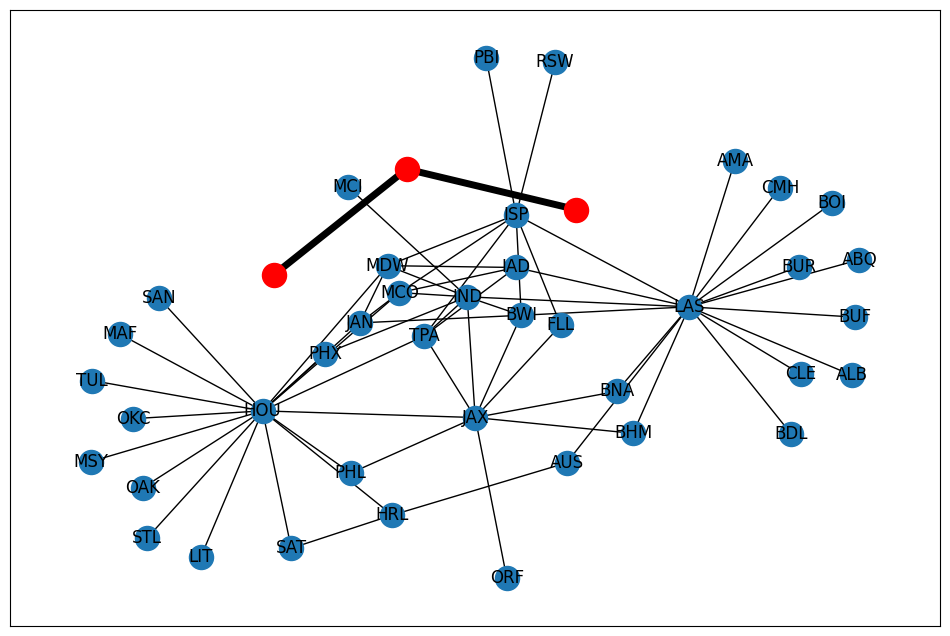

In [3]:
import networkx as nx
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

min = 0
max = 200
file = '2008 top 5000.csv'
default_option = 'Select'
seed = 1

def load_csv() -> pd.DataFrame:
    data = pd.read_csv(file)
    data = data.drop_duplicates().reset_index(drop=True)
    return data

def load_data() -> pd.DataFrame:
    data = load_csv()
    data_limited = data.iloc[min:max]
    return data_limited

def load_cities() -> pd.DataFrame:
    data = load_csv()
    temp = data.iloc[min:max]
    origin = np.insert(temp["Origin"].astype(str).unique(), 0, default_option)
    dest = np.insert(temp["Dest"].astype(str).unique(), 0, default_option)
    return origin, dest

def load_graph() -> pd.DataFrame:
    data = load_data()
    graph = nx.from_pandas_edgelist(data, source='Origin', target='Dest', edge_attr=True)

    plt.figure(figsize=(12,8))

    nx.draw_networkx(graph, with_labels=True)
    pos = nx.spring_layout(graph, seed=seed)

    return graph, pos

items = load_graph()
graph = items[0]
pos = items[1]

shortest_path_distance = nx.dijkstra_path(graph, source='HOU', target='AUS', weight='Distance')
path_edges = list(zip(shortest_path_distance, shortest_path_distance[1:]))
nx.draw_networkx_nodes(graph, pos, nodelist=shortest_path_distance, node_color='r')
nx.draw_networkx_edges(graph, pos, edgelist=path_edges, width=5)
plt.axis('equal')